In [14]:
!pip install scikit-learn==1.5.2
!pip install pandas
!pip install tqdm
!pip install matplotlib


  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl (2.2 MB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.6 MB 2.0 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.6 MB 2.2 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 2.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 1.9 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 2.0 MB/s eta 0:00:00


In [24]:
from sklearn.neural_network import MLPRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing 
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import tqdm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


(20640, 8) (20640,)


In [38]:
df_

,num_of_layers,num_of_neuron,relu,training_score,validation_score,testing_score,max_iter
0,1,8,identity,-0.310355,-0.308684,-0.300119,100
1,1,8,relu,0.022417,0.055869,0.040695,100
2,1,8,tanh,0.000272,-0.001553,-0.004394,100
3,1,8,logistic,0.000917,-0.000662,-0.000892,100
4,1,16,identity,0.341105,0.329886,0.347886,100
5,1,16,relu,0.508299,0.502560,0.521863,100
6,1,16,tanh,0.599547,0.570825,0.589777,100
7,1,16,logistic,0.640743,0.614651,0.636342,100
8,2,8,identity,0.521792,0.498630,0.521481,100
9,2,8,relu,0.388226,0.377182,0.390532,100


In [25]:
def line_plot(df):
        # Set up the plot
    plt.figure(figsize=(14, 8))

    # Plot training scores
    for layer in df['num_of_layers'].unique():
        subset = df[df['num_of_layers'] == layer]
        plt.plot(subset['num_of_neuron'], subset['training_score'], 
                marker='o', label=f'Training (Layers={layer})')

    # Plot validation scores
    for layer in df['num_of_layers'].unique():
        subset = df[df['num_of_layers'] == layer]
        plt.plot(subset['num_of_neuron'], subset['validation_score'], 
                marker='x', linestyle='--', label=f'Validation (Layers={layer})')

    # Plot testing scores
    for layer in df['num_of_layers'].unique():
        subset = df[df['num_of_layers'] == layer]
        plt.plot(subset['num_of_neuron'], subset['testing_score'], 
                marker='s', linestyle=':', label=f'Testing (Layers={layer})')

    # Set plot title and labels
    plt.title("Scores by Number of Layers, Neurons, and Activation Function")
    plt.xlabel("Number of Neurons")
    plt.ylabel("Score")
    plt.xticks(subset['num_of_neuron'].unique())
    plt.grid()
    plt.legend()
    plt.show()





In [27]:

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

df_=pd.DataFrame(columns=["num_of_layers","num_of_neuron","relu","training_score","validation_score","testing_score","max_iter"])
df_.columns
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Function to train and evaluate the model
def evaluate_model(param,df):
    model = MLPRegressor(**param)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Get training, validation, and test scores
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    test_score = model.score(X_test, y_test)
    
    data={
        "num_of_layers":f"{len(param["hidden_layer_sizes"])}",
        "num_of_neuron":f"{param["hidden_layer_sizes"][-1]}",
        "relu":f"{param["activation"]}",
        "training_score":train_score,
        "validation_score":val_score,
        "testing_score":test_score,
        "max_iter":param["max_iter"]

    }
    
    df=pd.concat([df, pd.DataFrame([data])], ignore_index=True)
    
    return df


lc = [1, 2, ] 
nc = [8, 16,]  
af = ['identity','relu', 'tanh', 'logistic']
param={"hidden_layer_sizes":(0,0), "activation":'', "solver":'adam', "alpha":0.0001, "batch_size":'auto', "learning_rate":'constant', "learning_rate_init":0.001, "max_iter":1, "shuffle":True, "random_state":1, "verbose":False, "momentum":0.9, "nesterovs_momentum":True, "early_stopping":False, "validation_fraction":0.1, "beta_1":0.9, "beta_2":0.999, "epsilon":1e-08, "n_iter_no_change":10}
# Run experiments
for layers in lc:
    for neurons in nc:
        for activation in af:
            param["activation"]=activation
            param["max_iter"]=100
            param["hidden_layer_sizes"]=(neurons,) * layers
            
            df_=evaluate_model(param,df_)


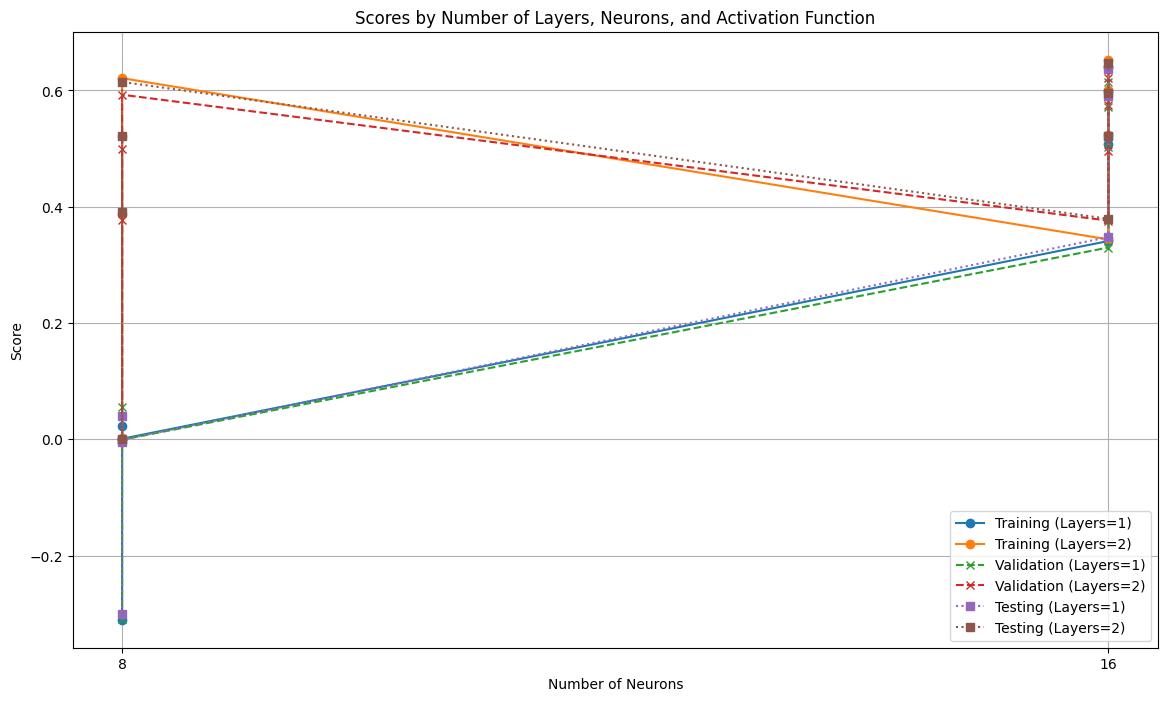

In [28]:
line_plot(df_)

Training with sgd optimizer...
Training with adam optimizer...


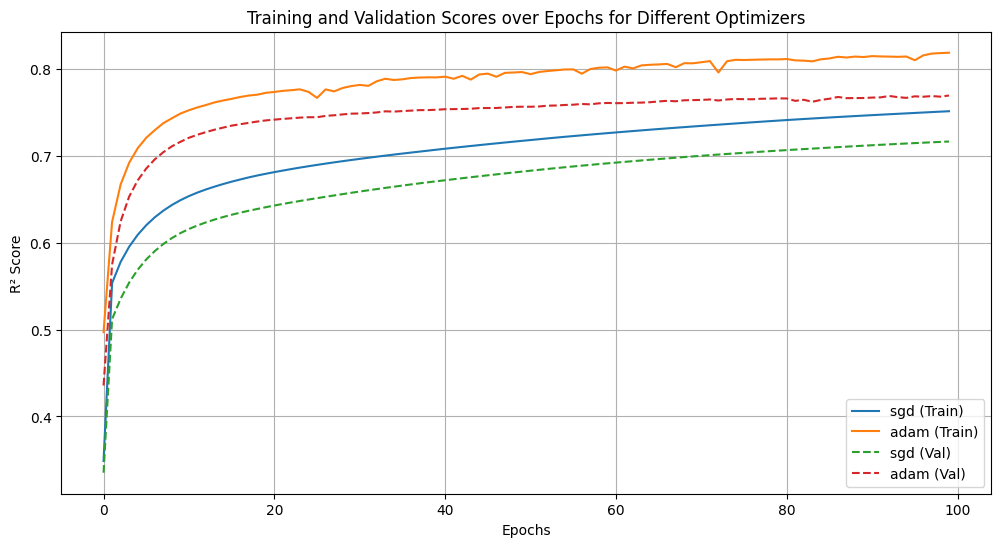

Final Test Score with sgd: 0.7406
Final Test Score with adam: 0.7963


In [18]:


# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Standardize the data (mean = 0 and variance = 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Function to train model with different solvers (optimizers)
def train_model(solver_name):
    # Initialize MLPRegressor with different solvers
    model = MLPRegressor(
        hidden_layer_sizes=(64, 64),  # Using a configuration with 2 layers and 64 neurons each
        activation='relu',
        solver=solver_name,
        alpha=0.0001, 
        learning_rate='constant',
        learning_rate_init=0.001,
        max_iter=1,  # Train for 1 iteration and update
        shuffle=True, 
        random_state=1, 
        verbose=False,
        momentum=0.9, 
        nesterovs_momentum=(solver_name == 'sgd'),  # Nesterov momentum if using 'sgd'
        early_stopping=False, 
        validation_fraction=0.1,
        n_iter_no_change=10
    )
    
    # Number of epochs
    n_epochs = 100
    train_scores, val_scores, test_scores = [], [], []
    
    # Train for multiple epochs
    for epoch in range(n_epochs):
        model.partial_fit(X_train, y_train)  # Fit the model with 1 epoch
        
        # Record training, validation, and test scores (R²)
        train_scores.append(model.score(X_train, y_train))
        val_scores.append(model.score(X_val, y_val))
        test_scores.append(model.score(X_test, y_test))
        
    return train_scores, val_scores, test_scores

# List of optimizers to try
solvers = ['sgd', 'adam']

# Dictionary to store results for each solver
results = {}

# Train model using different solvers
for solver in solvers:
    print(f"Training with {solver} optimizer...")
    train_scores, val_scores, test_scores = train_model(solver)
    results[solver] = {"train_scores": train_scores, "val_scores": val_scores, "test_scores": test_scores}

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot training scores
for solver in solvers:
    plt.plot(results[solver]["train_scores"], label=f'{solver} (Train)')
    
# Plot validation scores
for solver in solvers:
    plt.plot(results[solver]["val_scores"], label=f'{solver} (Val)', linestyle='--')

# Set plot labels and titles
plt.title("Training and Validation Scores over Epochs for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()

# Compare test scores at the end of training
for solver in solvers:
    final_test_score = results[solver]["test_scores"][-1]
    print(f"Final Test Score with {solver}: {final_test_score:.4f}")


In [2]:
df=(10,) * 11

In [3]:
df

(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)

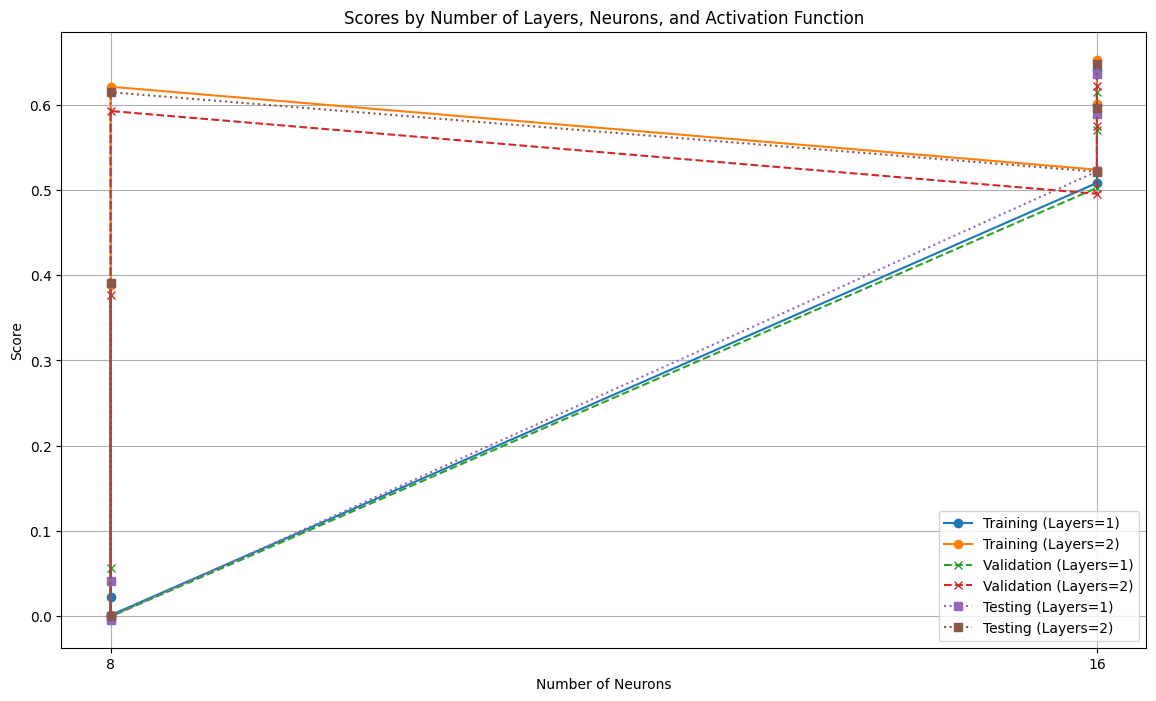

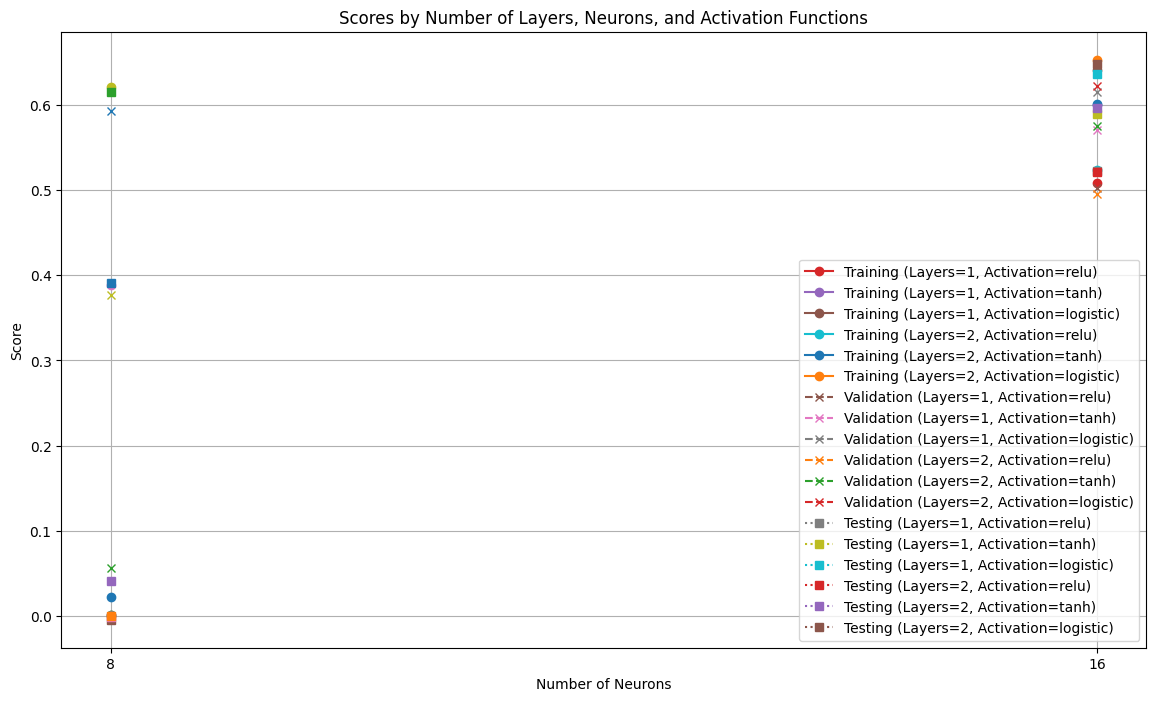

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
data = {
    "num_of_layers": [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
    "num_of_neuron": [8, 8, 8, 16, 16, 16, 8, 8, 8, 16, 16, 16],
    "activation": ['relu', 'tanh', 'logistic', 'relu', 'tanh', 'logistic', 
                   'relu', 'tanh', 'logistic', 'relu', 'tanh', 'logistic'],
    "training_score": [0.022417, 0.000272, 0.000917, 0.508299, 0.599547, 
                       0.640743, 0.388226, 0.001534, 0.621210, 0.523870, 
                       0.600629, 0.652918],
    "validation_score": [0.055869, -0.001553, -0.000662, 0.502560, 0.570825, 
                         0.614651, 0.377182, -0.000052, 0.592711, 0.495534, 
                         0.575273, 0.622008],
    "testing_score": [0.040695, -0.004394, -0.000892, 0.521863, 0.589777, 
                      0.636342, 0.390532, -0.000336, 0.614711, 0.521473, 
                      0.596376, 0.647478]
}

df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot training scores
for index, row in df.iterrows():
    plt.plot(row['num_of_neuron'], row['training_score'], marker='o', 
             label=f'Training (Layers={row["num_of_layers"]}, Activation={row["activation"]})')

# Plot validation scores
for index, row in df.iterrows():
    plt.plot(row['num_of_neuron'], row['validation_score'], marker='x', linestyle='--', 
             label=f'Validation (Layers={row["num_of_layers"]}, Activation={row["activation"]})')

# Plot testing scores
for index, row in df.iterrows():
    plt.plot(row['num_of_neuron'], row['testing_score'], marker='s', linestyle=':', 
             label=f'Testing (Layers={row["num_of_layers"]}, Activation={row["activation"]})')

# Set plot title and labels
plt.title("Scores by Number of Layers, Neurons, and Activation Functions")
plt.xlabel("Number of Neurons")
plt.ylabel("Score")
plt.xticks(df['num_of_neuron'].unique())
plt.grid()

# Remove duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()
